In [1]:
import os
import time
import math
import re
import struct
import traceback
import codecs
import bitstring

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2

from PIL import Image
import IPython.display as display

In [2]:
os.listdir('.')

['.ipynb_checkpoints',
 'co59-utf8.txt',
 'ETL2INFO',
 'ETL2_1',
 'ETL2_2',
 'ETL2_3',
 'ETL2_4',
 'ETL2_5',
 'etl_2_inspect_data.ipynb']

In [3]:
file_list = [    
    'ETL2_1',
    'ETL2_2',
    'ETL2_3',
    'ETL2_4',
    'ETL2_5',
]

In [4]:
t56s = '0123456789[#@:>? ABCDEFGHI&.](<  JKLMNOPQR-$*);\'|/STUVWXYZ ,%="!'

def T56(c):
    return t56s[c]

with codecs.open('co59-utf8.txt', 'r', 'utf-8') as co59f:
    co59t = co59f.read()
    
co59l = co59t.split()
CO59 = {}
for c in co59l:
    ch = c.split(':')
    co = ch[1].split(',')
    CO59[(int(co[0]), int(co[1]))] = ch[0]

In [5]:
CO59

{(4, 4): '上',
 (8, 4): '下',
 (12, 4): '不',
 (16, 4): '世',
 (20, 4): '両',
 (24, 4): '面',
 (6, 4): '中',
 (10, 4): '主',
 (14, 4): '義',
 (18, 4): '久',
 (22, 4): '予',
 (26, 4): '算',
 (5, 4): '催',
 (9, 4): '優',
 (13, 4): '児',
 (17, 4): '童',
 (21, 4): '先',
 (25, 4): '光',
 (7, 4): '公',
 (11, 4): '共',
 (15, 4): '内',
 (19, 4): '閣',
 (23, 4): '用',
 (27, 4): '同',
 (4, 6): '争',
 (8, 6): '事',
 (12, 6): '井',
 (16, 6): '文',
 (20, 6): '交',
 (24, 6): '夜',
 (6, 6): '変',
 (10, 6): '高',
 (14, 6): '商',
 (18, 6): '人',
 (22, 6): '入',
 (26, 6): '今',
 (5, 6): '岡',
 (9, 6): '次',
 (13, 6): '風',
 (17, 6): '出',
 (21, 6): '切',
 (25, 6): '列',
 (7, 6): '別',
 (11, 6): '制',
 (15, 6): '割',
 (19, 6): '劇',
 (23, 6): '力',
 (27, 6): '加',
 (4, 5): '合',
 (8, 5): '全',
 (12, 5): '化',
 (16, 5): '付',
 (20, 5): '代',
 (24, 5): '伝',
 (6, 5): '件',
 (10, 5): '任',
 (14, 5): '休',
 (18, 5): '位',
 (22, 5): '何',
 (26, 5): '佐',
 (5, 5): '助',
 (9, 5): '労',
 (13, 5): '働',
 (17, 5): '務',
 (21, 5): '医',
 (25, 5): '半',
 (7, 5): '協',
 (11, 5): '反'

In [6]:
len(CO59.keys())

2304

In [7]:
filename = file_list[0]
filename

'ETL2_1'

In [8]:
file_stream = bitstring.ConstBitStream(filename=filename)

In [9]:
RECORD_LENGTH = 6 * 3660

In [10]:
skip = 0
file_stream.pos = skip * RECORD_LENGTH

In [11]:
record = file_stream.readlist('int:36,uint:6,pad:30,6*uint:6,6*uint:6,pad:24,2*uint:6,pad:180,bytes:2700')

In [12]:
print(type(record), len(record))
record[:-1]

<class 'list'> 17


[1, 17, 34, 17, 37, 33, 25, 16, 36, 25, 37, 19, 24, 38, 4, 4]

In [13]:
print(record[0], T56(record[1]), ''.join(map(T56, record[2:8])), ''.join(map(T56, record[8:14])), CO59[tuple(record[14:16])])

1 A KANJI  MINCHO 上


In [14]:
record_dict = {
    'serial_index': record[0], # type: int
    'source': T56(record[1]), # 'A': Mincho Newspaper, 'B': Gothic Newspaper, 'C': Mincho Patent, 'D': Gothic Patent
    'class': ''.join(map(T56, record[2:8])), # 'KANJI': kanji, 'EIJI': roman alphabets, 'HRKANA': hiragana, 'KTKANA': katakana, 'KIGO': special characters, 'SUUJI': numerals
    'font': ''.join(map(T56, record[8:14])), # ('MINCHO', 'GOTHIC')
    'character': CO59[tuple(record[14:16])],
    'image_data': record[16],
}

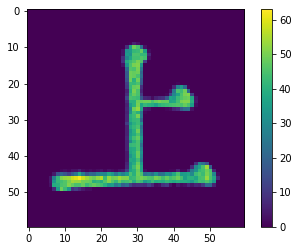

In [15]:
width = 60
height = 60
np_img = np.array(Image.frombytes('F', (width, height), record_dict['image_data'], 'bit', 6))

plt.imshow(np_img)
plt.colorbar()

In [16]:
total_samples = 0
record_count = {}
RECORD_LENGTH = 6 * 3660 # bits

for filename in file_list:

    file_stream = bitstring.ConstBitStream(filename=filename)

    while True:
        try:
            record = file_stream.readlist('int:36,uint:6,pad:30,6*uint:6,6*uint:6,pad:24,2*uint:6,pad:180,bytes:2700')
        except:
            # print(record)
            # traceback.print_exc()
            break
        
        total_samples += 1
        record_dict = {
            'serial_index': record[0], # type: int
            'source': T56(record[1]), # 'A': Mincho Newspaper, 'B': Gothic Newspaper, 'C': Mincho Patent, 'D': Gothic Patent
            'class': ''.join(map(T56, record[2:8])), # 'KANJI': kanji, 'EIJI': roman alphabets, 'HRKANA': hiragana, 'KTKANA': katakana, 'KIGO': special characters, 'SUUJI': numerals
            'font': ''.join(map(T56, record[8:14])), # ('MINCHO', 'GOTHIC')
            'character': CO59[tuple(record[14:16])],
            'image_data': record[16],
        }

        name = record_dict['character']

        if name in record_count.keys():
            record_count[name] += 1
        else:
            record_count[name] = 1

In [17]:
total_samples

52796

In [18]:
len(record_count.keys())

2168

In [19]:
record_count

{'上': 40,
 '下': 40,
 '不': 40,
 '世': 40,
 '両': 40,
 '面': 40,
 '中': 40,
 '主': 40,
 '義': 40,
 '久': 40,
 '予': 40,
 '算': 40,
 '催': 40,
 '優': 40,
 '児': 40,
 '童': 40,
 '先': 40,
 '光': 40,
 '公': 40,
 '共': 40,
 '内': 40,
 '閣': 40,
 '用': 40,
 '同': 40,
 '争': 40,
 '事': 40,
 '井': 40,
 '文': 40,
 '交': 40,
 '夜': 40,
 '変': 40,
 '高': 40,
 '商': 40,
 '人': 40,
 '入': 40,
 '今': 40,
 '岡': 40,
 '次': 40,
 '風': 40,
 '出': 40,
 '切': 40,
 '列': 40,
 '別': 40,
 '制': 40,
 '割': 40,
 '劇': 40,
 '力': 40,
 '加': 40,
 '合': 40,
 '全': 40,
 '化': 40,
 '付': 40,
 '代': 40,
 '伝': 40,
 '件': 40,
 '任': 40,
 '休': 40,
 '位': 40,
 '何': 40,
 '佐': 40,
 '助': 40,
 '労': 40,
 '働': 40,
 '務': 40,
 '医': 40,
 '半': 40,
 '協': 40,
 '反': 40,
 '対': 40,
 '原': 40,
 '去': 40,
 '収': 40,
 '作': 40,
 '住': 40,
 '体': 40,
 '使': 40,
 '供': 40,
 '価': 40,
 '保': 40,
 '信': 40,
 '便': 40,
 '係': 40,
 '値': 40,
 '備': 40,
 '受': 40,
 '取': 40,
 '口': 40,
 '古': 40,
 '可': 40,
 '各': 40,
 '名': 40,
 '向': 40,
 '吉': 40,
 '告': 40,
 '品': 40,
 '員': 40,
 '回': 40,
 '団': 40,
 '国': 40,
 '民': 40,


In [29]:
csv_filename = 'classes.tsv'
with open(csv_filename, mode='w', encoding='utf-8') as f:
    f.write('class\tnum_samples\n')
    for k in record_count.keys():
        log_str = f'{k}\t{record_count[k]}\n'
        f.write(log_str)
pd_df = pd.read_csv(csv_filename, encoding='utf-8', sep='\t')
pd_df = pd_df.sort_values(['class'])
pd_df.to_csv(csv_filename, encoding='utf-8', index=False, sep='\t')